In [14]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import tweepy
import time
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [15]:
# twitter credentials 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [16]:
# List of new news network twitter accounts
target_users = ['@BBCWorld', '@CBS', '@CNN', '@FoxNews', '@nytimes']

In [17]:
# Empty lists to append to
news_networks = []
account = []
date = []
text = []
tweet_numbers = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [18]:
# Loop through last 100 tweets from each network and use a sentiment analysis
for news in target_users:
    public_tweets = api.user_timeline(news, count=100)
    for tweet in public_tweets:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        
        news_networks.append(news)
        account.append(tweet["user"]["name"])
        date.append(tweet["created_at"])
        text.append(tweet["text"])
        
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

In [19]:
# make a dataframe 
news_tweets_df = pd.DataFrame({
    "Account":news_networks,
    "Network":account,
    "Date":date,
    "Text":text,
    "Compound":compound_list,
    "Positive":positive_list,
    "Neutral":neutral_list,
    "Negative":negative_list,
})

news_tweets_df = news_tweets_df.sort_values("Date", ascending=True)
news_tweet_reset = news_tweets_df.reset_index(drop=True)
news_tweet_df = news_tweet_reset[["Account", "Network", "Text", "Date", "Positive", "Neutral", "Negative", "Compound"]]
news_tweet_df.head()

,Account,Network,Text,Date,Positive,Neutral,Negative,Compound
0,@CBS,CBS,Happy #InternationalKissingDay! See which star...,Fri Jul 06 18:26:37 +0000 2018,0.390,0.610,0.000,0.8622
1,@CBS,CBS,"RT @SalvationCBS: Mark your calendars, #Salvie...",Fri Jul 06 22:22:55 +0000 2018,0.153,0.847,0.000,0.4019
2,@CBS,CBS,Take a walk down @YandR_CBS memory lane with s...,Fri Jul 13 17:49:38 +0000 2018,0.000,1.000,0.000,0.0000
3,@CBS,CBS,RT @TheNeighborhood: There's a new family on t...,Fri Jul 13 21:15:41 +0000 2018,0.000,0.868,0.132,-0.4404
4,@CBS,CBS,Stand up. Speak up. Blow the whistle. \n\nDon'...,Fri Jul 13 21:35:01 +0000 2018,0.078,0.922,0.000,0.1139


In [20]:
# Export into CSV
news_tweet_df.to_csv("exported_files/news_tweet_sentiment_analysis.csv")

In [21]:
# Build a Data Frame of averages from Vader Analysis
summary_table = pd.DataFrame({
    "Average Compound": news_tweet_df.groupby("Network")["Compound"].mean(),
    "Average Positive": news_tweet_df.groupby("Network")["Positive"].mean(),
    "Average Neutral": news_tweet_df.groupby("Network")["Neutral"].mean(),
    "Average Negative": news_tweet_df.groupby("Network")["Negative"].mean(),
})
summary_table

,Average Compound,Average Negative,Average Neutral,Average Positive
Network,,,,
BBC News (World),-0.157574,0.14641,0.80514,0.04846
CBS,0.255927,0.02057,0.83666,0.14280
CNN,-0.044318,0.06254,0.88766,0.04977
Fox News,-0.010746,0.09936,0.81458,0.08608
The New York Times,-0.006865,0.07433,0.85428,0.07138


In [22]:
news_tweet_count = pd.DataFrame({"Number of Tweets": news_tweet_df["Network"].value_counts()})
news_tweet_count

,Number of Tweets
Fox News,100
CBS,100
BBC News (World),100
The New York Times,100
CNN,100


In [23]:
# Seperating DataFrames by Network
bbc_df = news_tweet_df.loc[news_tweet_df["Network"] == "@BBC"]
cbs_df = news_tweet_df.loc[news_tweet_df["Network"] == "@CBS"]
cnn_df = news_tweet_df.loc[news_tweet_df["Network"] == "@CNN"]
fox_news_df = news_tweet_df.loc[news_tweet_df["Network"] == "@FoxNews"]
nytimes_df = news_tweet_df.loc[news_tweet_df["Network"] == "@nytimes"]

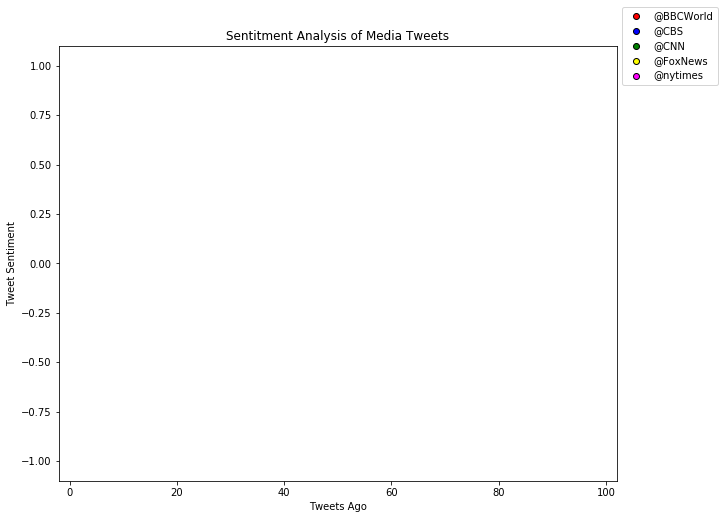

In [24]:
plt.figure(figsize=(10,8))

#Set plots on chart
plt.scatter(np.arange(len(bbc_df["Text"])), bbc_df["Compound"], edgecolors="black", c='red',marker="o",alpha=1)
plt.scatter(np.arange(len(cbs_df["Text"])), cbs_df["Compound"], edgecolors="black", c='blue', marker="o", alpha=1)
plt.scatter(np.arange(len(cnn_df["Text"])), cnn_df["Compound"], edgecolors="black", c='green')
plt.scatter(np.arange(len(fox_news_df["Text"])), fox_news_df["Compound"], edgecolors="black", c="yellow")
plt.scatter(np.arange(len(nytimes_df["Text"])), nytimes_df["Compound"], edgecolors="black", c='magenta', marker="o", alpha=1)

# Set Demisions of Scatter Plot
plt.ylim(-1.10, 1.10)
plt.xlim(-2, 102)
plt.title(f"Sentitment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Sentiment")

# Add Legend
plt.legend(target_users, loc='center left', bbox_to_anchor=(1, 1))

plt.savefig("exported_files/sentiment_scatter_plot.png", dpi=100,  bbox_inches='tight')
plt.show()


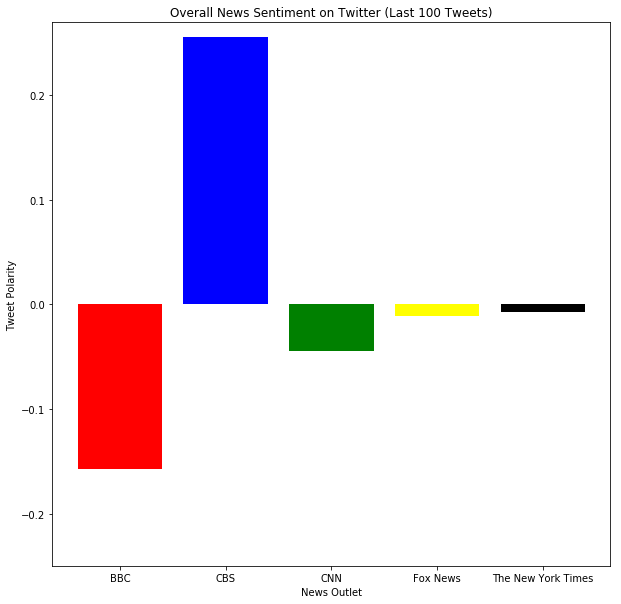

In [26]:
# set average compound scores into a bar graph
average_compound = summary_table["Average Compound"]
news_networks = ("BBC", "CBS", "CNN", "Fox News", "The New York Times")
y_axis = np.arange(len(news_networks))
plt.figure(figsize=(10, 10))
plt.bar(y_axis, average_compound, color=["red", "blue", "green", "yellow", "black"])
plt.title("Overall News Sentiment on Twitter (Last 100 Tweets)")
plt.ylabel("Tweet Polarity")
plt.xlabel("News Outlet")
plt.xticks(y_axis, news_networks)
plt.ylim(-0.25, 0.27)
plt.savefig("exported_files/average_compound.png")
plt.show()
